In [28]:
#raise Exception("Did you really think I would just let you run it, without editing the notebook at all?")

## Imports

In [29]:
import pandas as pd
import numpy as np
from scipy import stats

## Custom funtions

In [30]:
# this is unfinished, finish this function!

def grade_setter(x: int) -> str:
    """
    This function takes in a number and returns a letter grade.
    """

    if x == 0:
        return "Undefined Grade"

    if x < 16.6:
        return "F"
    
    if x > 16.6 and x < 33.2:
        return "E"

    if x > 33.2 and x < 49.8:
        return "D"
    
    if x > 49.8 and x < 66.4:
        return "C"
    
    if x > 66.4 and x < 83:
        return "B"
    
    if x > 83:
        return "A"

## Fetcing data from csv

In [31]:
# Reading data
df = pd.read_csv("students.csv")

## Exploring data

There are more functions than just the code block beneath to explore the data!

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     int64  
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


## Data Cleaning

Here you should do what is needed to remove NaN values

In [25]:
df = df.fillna(0)

z_scores = stats.zscore(df["FinalGrade"])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]


## Feature Engineering - Making Letter Grade

<AxesSubplot:>

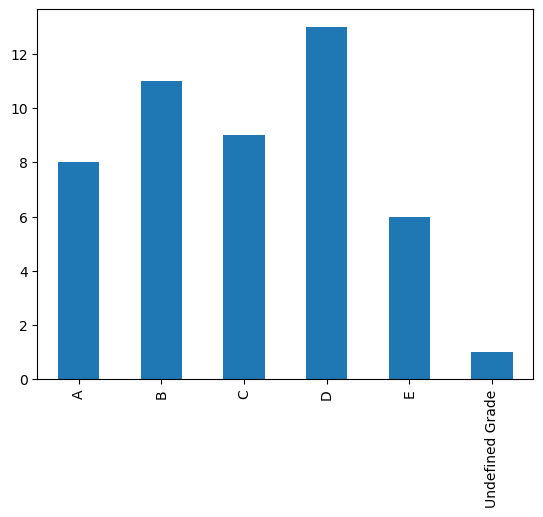

In [26]:
# How to apply a function to a column
df["LetterGrade"] = df["FinalGrade"].apply(lambda x: grade_setter(x))

df["LetterGrade"].value_counts().sort_index().plot.bar()

<AxesSubplot:>

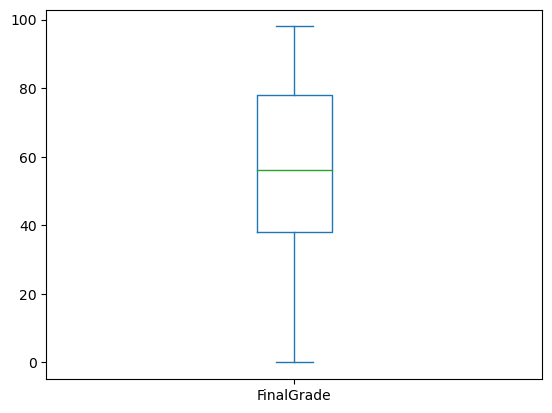

In [10]:
df["FinalGrade"].plot.box()

In [11]:
df["LetterGrade"].value_counts()

D                  13
B                  11
C                   9
A                   8
E                   6
Undefined Grade     1
Name: LetterGrade, dtype: int64